In [ ]:
#Decision Tree

It is Supervised Machine learning Model (Classification and Regression)
* Root node - It Represents my entire dataset
* Splitting - We split the data (Features) into internal nodes(By decision criteria)(Gini impurity,entropy and information gain)
* Leaf node - Terminal node (Target value) (purest form)
* These things goes into a recursion(function call itself until the condition satisfies)
* Predict

In [ ]:
Dataset link - https://drive.google.com/file/d/1k3Yhgzrgzl9CbdGXuZvK7WgbZ8kVx56I/view?usp=sharing

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Load Dataset
df = pd.read_csv('/content/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


* age - Patient age
* Sex - Gender 1 -> Male 0-> Female
* CP -> chest pain
* trestbps -> resting bloog pressure(in mm/hg)
* chol -> blood cholestrol level
* fbs -> Fasting blood sugar
* restecg -> heart activity while resting
* thalach -> Max heart rate while excercise
* exang -> Is there any pain during excercise
* oldpeak -> Electrical activities of heart
* slope -> 0 -> upslope , 1-> flat, 2 -> downslope
* ca -> whether in vessels there are blockage or vessels is being narrow down or not
* Thal -> Thallium test (Permanent damage or healthy heart)
* Target -> Heart disease present or not

In [ ]:
#EDA

In [ ]:
df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Insights**
* There is no null values
* all columns are numeric value

In [ ]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
df.drop_duplicates(inplace= True)
# df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df['target'].value_counts()

#as we can say, our data is somewhat imbalanace

,count
target,
1,164
0,138


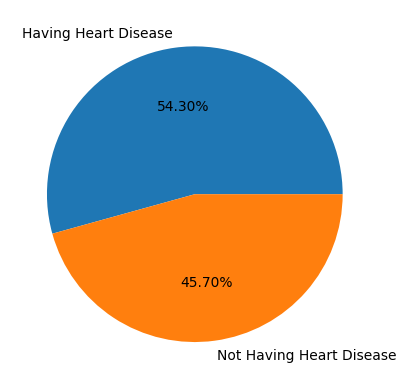

In [ ]:
plt.pie(df['target'].value_counts(), autopct='%0.2f%%', labels = ['Having Heart Disease', 'Not Having Heart Disease'])
plt.show()

In [ ]:
#What if my data is imbalanced?

we use Synthetic data(Dummy Data), Oversampling and Undersampling (SMOTE)

In [ ]:
#Cholestrol
df[df['chol']>300]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2,1
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1
45,52,1,1,120,325,0,1,172,0,0.2,2,0,2,1
51,66,1,0,120,302,0,0,151,0,0.4,1,0,2,1


In [ ]:
df[df['chol']>300].shape

(43, 14)

In [ ]:
#High Cholestral and age greater than 40
df[(df['chol'] > 300) & (df['age'] > 40)].shape


(42, 14)

In [ ]:
df[(df['chol'] > 300) & (df['age'] > 40)].shape

(42, 14)

*   Patient above 40 are getting higher risk of having more than 300 chol level




In [ ]:
#High Cholestral and age greater than 40, having heart disease
df[(df['chol'] > 300) & (df['age'] > 40) & (df['target'] == 1)].shape

(22, 14)

**Let's see which column is correlated with my target**

In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


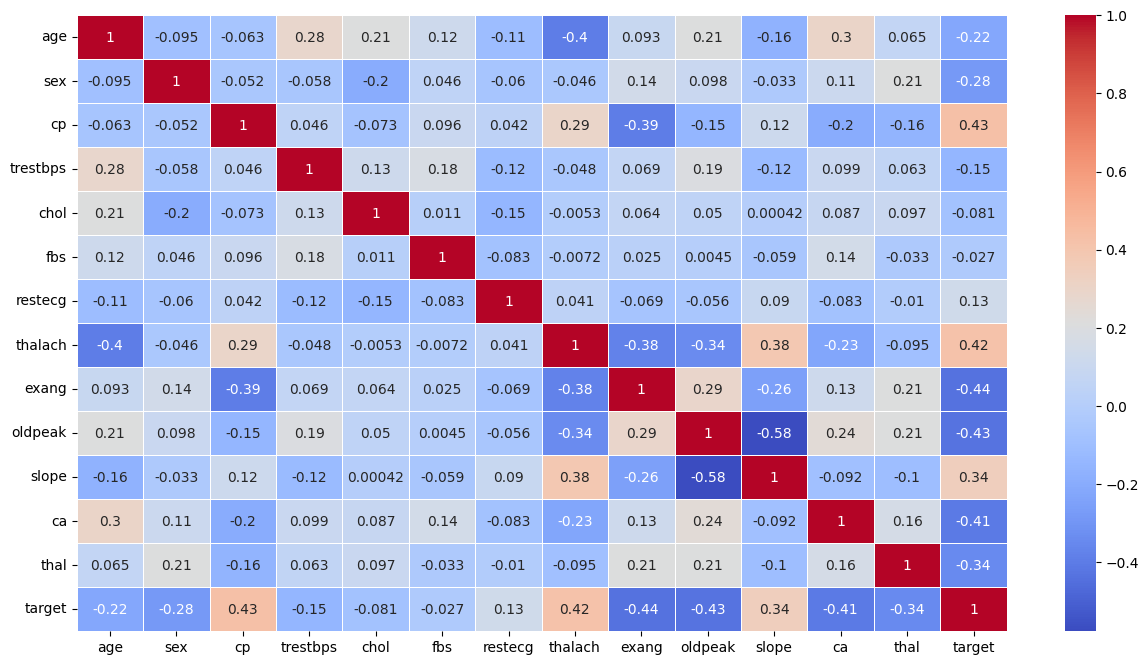

In [ ]:
#Correlation graph

plt.figure(figsize= (15,8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', linewidths=0.5)
plt.show()

In [ ]:
#Statistical summary
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


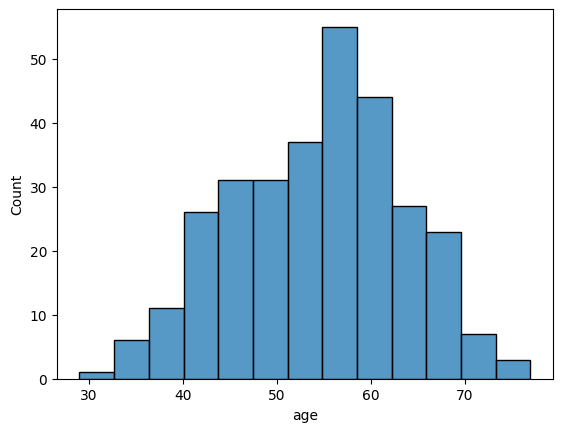

In [ ]:
#Distribution graph of age
sns.histplot(x =df['age'])
plt.show()

/tmp/ipython-input-1208774830.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==1]['age'], label= 'Male')
/tmp/ipython-input-1208774830.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==0]['age'], label= 'Female')


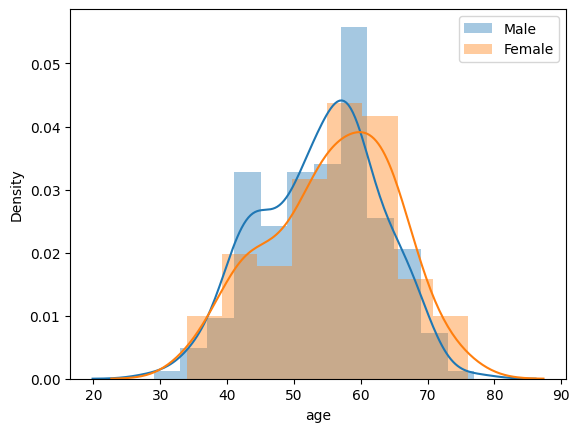

In [ ]:
#Gender wise distribution
sns.distplot(df[df['sex']==1]['age'], label= 'Male')
sns.distplot(df[df['sex']==0]['age'], label= 'Female')
plt.legend()
plt.show()

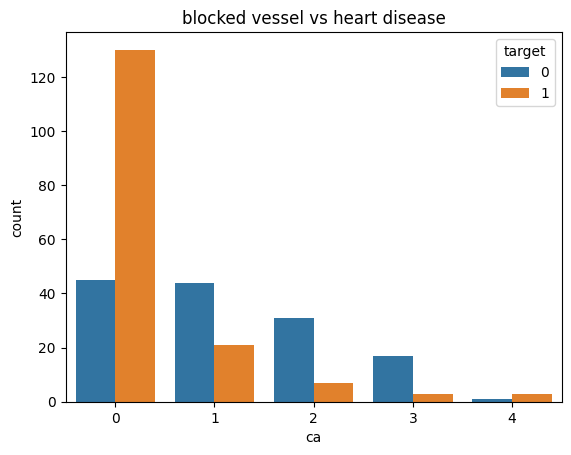

In [ ]:
#to check the -ve correlation between ca and target
sns.countplot(x= 'ca', hue = 'target', data = df)
plt.title('blocked vessel vs heart disease')
plt.show()

### Model Building
* Supervised model building part -> Classification
* Divide the data into train and test set
* Create a model
* Train our model
* Test our model -> yPred -> Prediction
* Performance of the model -> Accuracy score, confusion matrix, classification report

In [ ]:
x = df.iloc[:,:-1] # Independent variables or features
y = df['target'] # Dependent variable or feature

In [ ]:
x.shape

(302, 13)

In [ ]:
y.shape

(302,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, train_size=0.70)

In [ ]:
x_train # Questions that my model is going to learn

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2


In [ ]:
y_train # Answers that my model is going to learn

,target
124,1
72,1
15,1
10,1
163,1
...,...
189,0
71,1
106,1
271,0


In [ ]:
x_test # Questions that i will ask to my model

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2
143,67,0,0,106,223,0,1,142,0,0.3,2,2,2
79,58,1,2,105,240,0,0,154,1,0.6,1,0,3


In [ ]:
# yPred -> Answer that my model will give

**Import Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
yPred = model.predict(x_test)

In [ ]:
yPred

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1])

In [ ]:
y_test # Actual answer

,target
180,0
229,0
111,1
247,0
60,1
...,...
251,0
19,1
143,1
79,1


**Evaluating Model**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print('Confusion matrix')
print(confusion_matrix(y_test,yPred))

Confusion matrix
[[35  7]
 [ 8 41]]


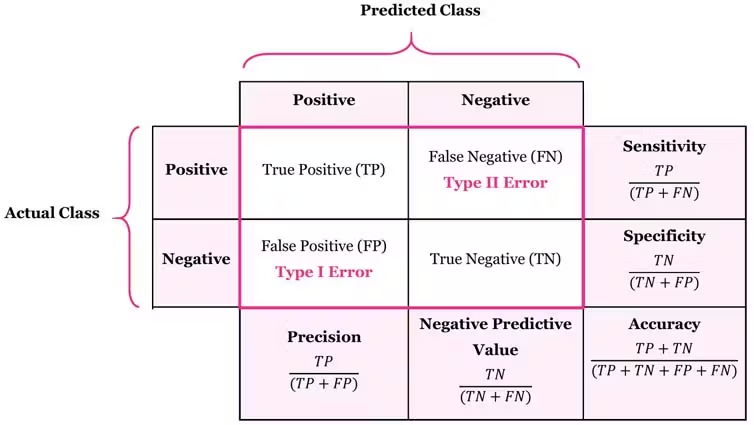

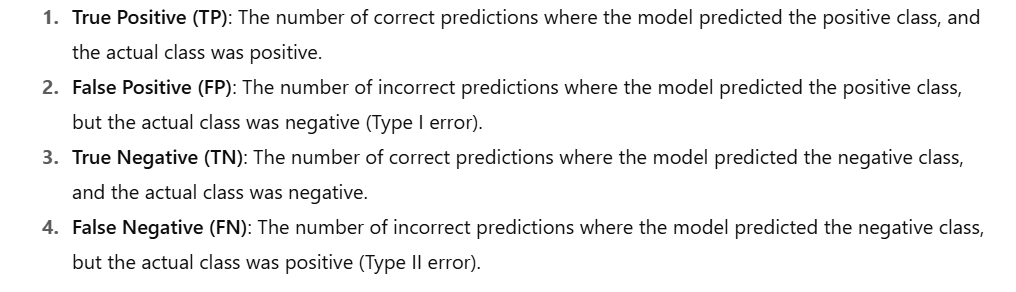

In [ ]:
print('Accuracy Score')
print(accuracy_score(y_test, yPred))

Accuracy Score
0.8351648351648352


In [ ]:
print('Classification report')
print(classification_report(y_test, yPred))

Classification report
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        42
           1       0.85      0.84      0.85        49

    accuracy                           0.84        91
   macro avg       0.83      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



In [ ]:
# Hyperparameter tuning ->To improve your model accuracy, we can implement this.

\**Some important parameters of DT**

* Criterion -> By default (gini), entropy
* max_depth -> maximum depth of the tree -> default (none)
* min_sample_split
* min_sample_leaf

[Text(0.48522727272727273, 0.9444444444444444, 'x[2] <= 0.5\ngini = 0.496\nsamples = 211\nvalue = [96.0, 115.0]'),
 Text(0.2545454545454545, 0.8333333333333334, 'x[11] <= 0.5\ngini = 0.395\nsamples = 96\nvalue = [70, 26]'),
 Text(0.3698863636363636, 0.8888888888888888, 'True  '),
 Text(0.16363636363636364, 0.7222222222222222, 'x[12] <= 2.5\ngini = 0.5\nsamples = 48\nvalue = [24, 24]'),
 Text(0.09090909090909091, 0.6111111111111112, 'x[8] <= 0.5\ngini = 0.384\nsamples = 27\nvalue = [7, 20]'),
 Text(0.03636363636363636, 0.5, 'x[4] <= 316.5\ngini = 0.111\nsamples = 17\nvalue = [1, 16]'),
 Text(0.01818181818181818, 0.3888888888888889, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.05454545454545454, 0.3888888888888889, 'x[4] <= 362.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.03636363636363636, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07272727272727272, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.14545454545454545, 

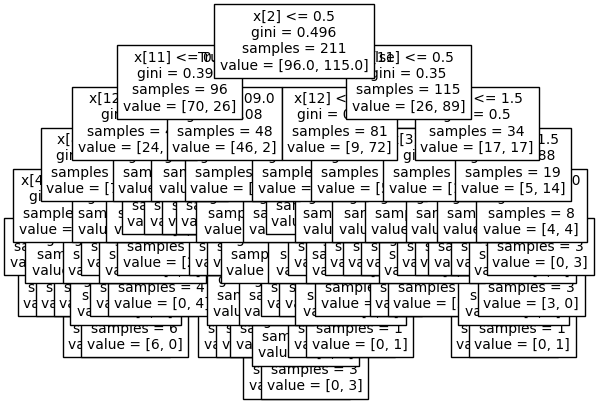

In [ ]:
from sklearn import tree
tree.plot_tree(model,fontsize = 10)

In [ ]:
pip install graphviz

In [ ]:
import graphviz
y = y.astype(str)

In [ ]:
classNames = y.unique()

In [ ]:
dt_Data = tree.export_graphviz(model,out_file=None,feature_names=x.columns,class_names=classNames,filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(dt_Data)
graph.render('DT')
graph.view('DT')

'DT.pdf'